In [1]:
from regraph import Rule, plot_rule, plot_graph, plot_instance, find_matching
from regraph.default.primitives import *

import networkx as nx

In [2]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["gene1", "gene2", "residue"])
add_edges_from(pattern, [("residue", "gene1"), ("residue", "gene2")])

In [3]:
rule = Rule.from_transform(pattern)
rule.inject_merge_nodes(["gene1", "gene2"])
rule.inject_add_node("new_node")
rule.inject_add_edge("residue", "new_node")
rule.inject_clone_node("residue")

('residue1', 'residue1')

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


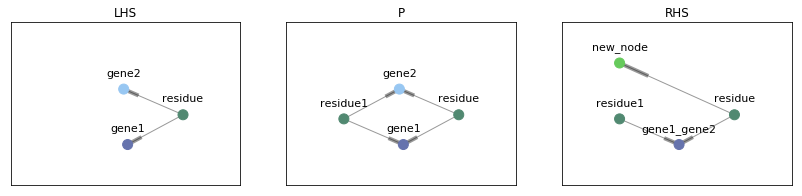

In [4]:
plot_rule(rule)

In [5]:
print(rule.to_commands())

CLONE residue AS residue1.
ADD_NODE new_node {}.
ADD_EDGE residue new_node {}.
MERGE [gene1, gene2] AS 'gene1_gene2'.



In [6]:
g = nx.DiGraph()
add_nodes_from(g, [1, 2, 3, 4, 5, 6])
add_edges_from(g, [(2, 1), (2, 3), (3, 4), (3, 5)])

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


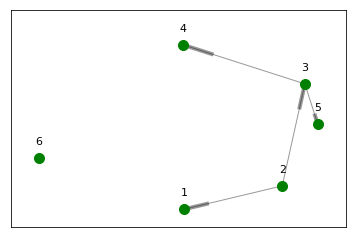

In [7]:
pos = plot_graph(g)

In [8]:
instances = find_matching(g, rule.lhs)

In [9]:
instances

[{'gene1': 1, 'gene2': 3, 'residue': 2},
 {'gene1': 3, 'gene2': 1, 'residue': 2},
 {'gene1': 4, 'gene2': 5, 'residue': 3},
 {'gene1': 5, 'gene2': 4, 'residue': 3}]

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


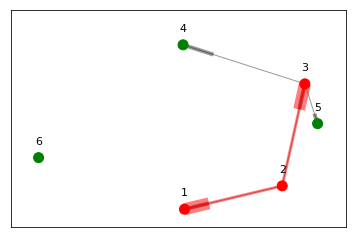

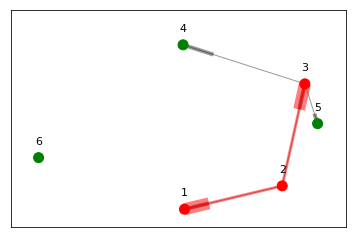

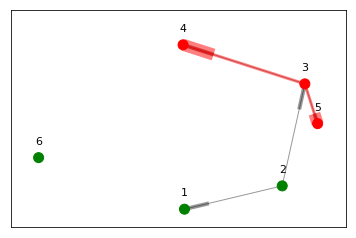

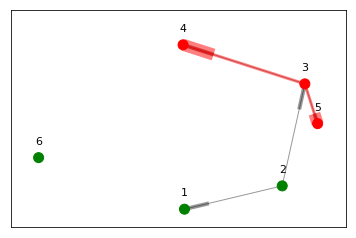

In [10]:
for instance in instances:
    plot_instance(g, rule.lhs, instance, parent_pos=pos)

In [11]:
rule.apply_to(g, instances[0], inplace=True)

(<networkx.classes.digraph.DiGraph at 0x7f2ad1bb3d68>,
 {'gene1_gene2': '1_3',
  'new_node': 'new_node',
  'residue': 2,
  'residue1': '21'})

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


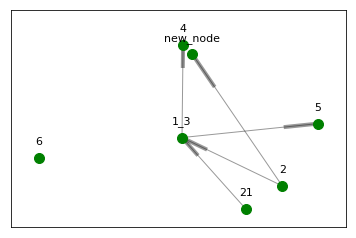

{1: array([ 0.5228564,  0.       ]),
 2: array([ 0.87317444,  0.13847814]),
 3: array([ 0.95431254,  0.74448524]),
 4: array([ 0.51779615,  0.97649508]),
 5: array([ 1.        ,  0.50817282]),
 6: array([ 0.        ,  0.30623093]),
 '21': array([ 0.74333018,  0.        ]),
 '1_3': array([ 0.51399004,  0.42537865]),
 'new_node': array([ 0.5504065 ,  0.92163092])}

In [12]:
plot_graph(g, parent_pos=pos)

In [13]:
pattern = nx.DiGraph()
add_nodes_from(pattern, ["x", "circle", "square", "dot"])
add_edges_from(pattern, [("x", "dot"), ("circle", "dot"), ("square", "dot")])

In [14]:
rule = Rule.from_transform(pattern)

rule.inject_remove_node("x")
p_new_name, _ = rule.inject_clone_node("circle")
rule.inject_remove_edge(p_new_name, "dot"),
merge_name = rule.inject_merge_nodes([p_new_name, "square"])
rule.inject_add_node("y")
rule.inject_add_edge(merge_name, "y")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


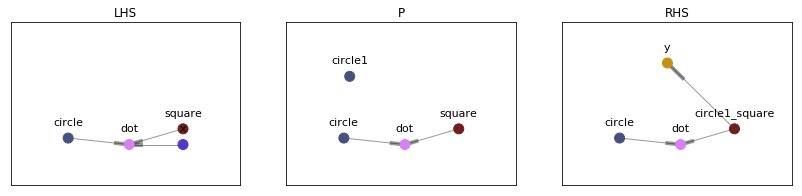

In [15]:
plot_rule(rule)

In [16]:
print(rule.to_commands())

CLONE circle AS circle1.
DELETE_NODE x.
DELETE_EDGE circle1 dot.
ADD_NODE y {}.
ADD_EDGE circle1_square y {}.
MERGE [circle1, square] AS 'circle1_square'.

